In [1]:
from autolens.model.profiles import light_profiles
from autolens.model.profiles import mass_profiles
from autolens.model.galaxy import galaxy
from autolens.lensing import ray_tracing
from autolens.imaging import grids
from autolens.lensing.plotters import plane_plotters
from autolens.lensing.plotters import ray_tracing_plotters

# In this example, we'll use 'mass_profiles', 'light_profiles' and 'galaxy', along with the 'ray-tracing' 
# module, to perform ray-tracing of a lens-plane + source-plane strong lens configuration, where:
# 1) The lens galaxy has an isothermal mass distribution
# 2) The source galaxy has a Sersic surface brightness.

In [2]:
# Same grid as always, you should be used to seeing this now!
image_plane_grids = grids.ImagingGrids.from_shape_and_pixel_scale(shape=(100, 100), pixel_scale=0.05, 
                                                                 sub_grid_size=2)

In [3]:
# Lets use a simple SIS mass profile, and use it to create our lens galaxy.
sis_mass_profile = mass_profiles.SphericalIsothermal(centre=(0.1, 0.1), einstein_radius=1.6)
lens_galaxy = galaxy.Galaxy(mass=sis_mass_profile)
print(lens_galaxy)

Redshift: None
Mass Profiles:
SphericalIsothermal
centre: (0.1, 0.1)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


In [4]:
# And lets make our source-galaxy using a Sersic light profile
sersic_light_profile = light_profiles.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.8, phi=45.0,
                                                       intensity=1.0, effective_radius=1.0, sersic_index=2.5)
source_galaxy = galaxy.Galaxy(light=sersic_light_profile)
print(source_galaxy)

Redshift: None
Light Profiles:
EllipticalSersic
centre: (0.0, 0.0)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


In [5]:
# Finally, we use the lens galaxy and source galaxy to ray-trace our grids. When we pass our galaxies and grids into the
# Tracer below, the following happens:

# 1) Using the lens-galaxy's mass-profile, the deflection angle of every image-plane grid coordinate is computed.
# 2) These deflection angles are used to trace every image-plane coordinate to a source-plane coordinate.
# 3) This creates a source-plane grid of lensed coordinates.

# We use the 'ray_tracing' module to perform this operation.
tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy], source_galaxies=[source_galaxy],
                                             image_plane_grids=[image_plane_grids])

In [6]:
# The tracer is composed of an image-plane and source-plane, just like in the previous example!
print('Image-pixel 1 image-plane coordinate')
print(tracer.image_plane.grids[0].image[0])
print('Image-pixel 2 image-plane coordinate')
print(tracer.image_plane.grids[0].image[1])
print('Image-pixel 3 image-plane coordinate')
print(tracer.image_plane.grids[0].image[2])

# And the source-plane's grid has been deflected.
print('Image-pixel 1 source-plane coordinate')
print(tracer.source_plane.grids[0].image[0])
print('Image-pixel 2 source-plane coordinate')
print(tracer.source_plane.grids[0].image[1])
print('Image-pixel 3 source-plane coordinate')
print(tracer.source_plane.grids[0].image[2])

Image-pixel 1 image-plane coordinate
[ 2.475 -2.475]
Image-pixel 2 image-plane coordinate
[ 2.475 -2.425]
Image-pixel 3 image-plane coordinate
[ 2.475 -2.375]
Image-pixel 1 source-plane coordinate
[ 1.39022618 -1.29887681]
Image-pixel 2 source-plane coordinate
[ 1.37877647 -1.2595413 ]
Image-pixel 3 source-plane coordinate
[ 1.36719184 -1.22054728]


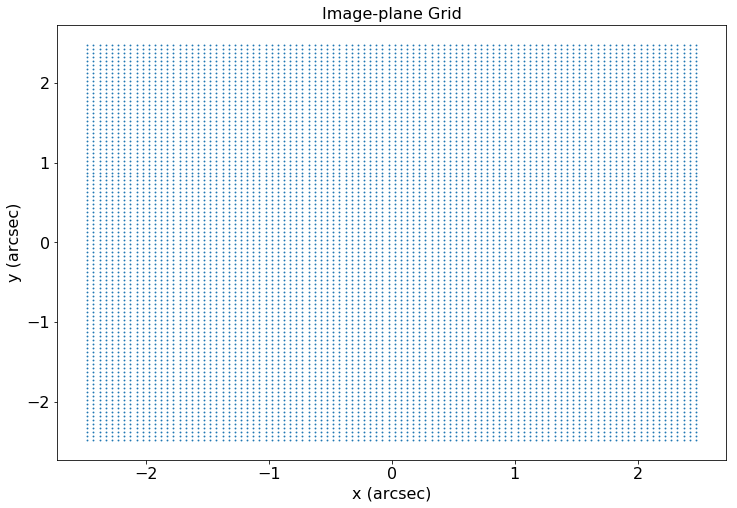

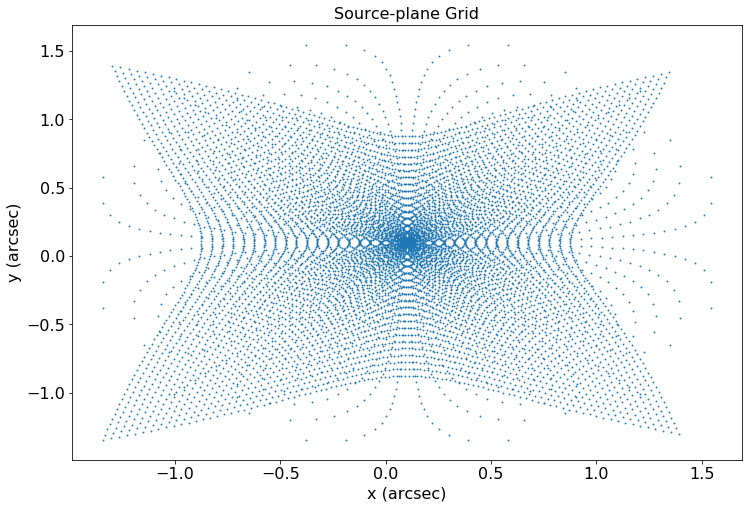

In [7]:
# We can use the plane_plotter to plot these grids.
# The image grid is simply a 100 x 100 uniform grid of coordinates.
plane_plotters.plot_plane_grid(plane=tracer.image_plane, title='Image-plane Grid')
# Clearly, the source-plane grid has been lensed
plane_plotters.plot_plane_grid(plane=tracer.source_plane, title='Source-plane Grid')

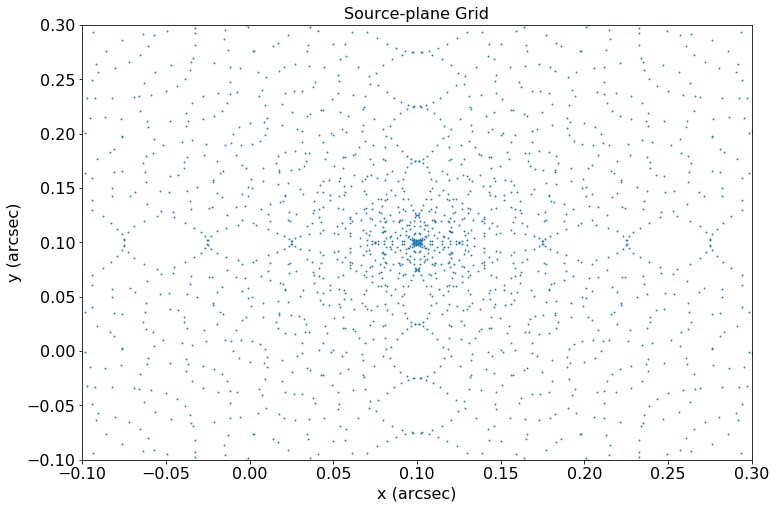

In [8]:
# We can zoom in on the 'centre' of the source-plane (remembering the lens galaxy was centred at (0.1, 0.1)
plane_plotters.plot_plane_grid(plane=tracer.source_plane, axis_limits=[-0.1, 0.3, -0.1, 0.3], title='Source-plane Grid')

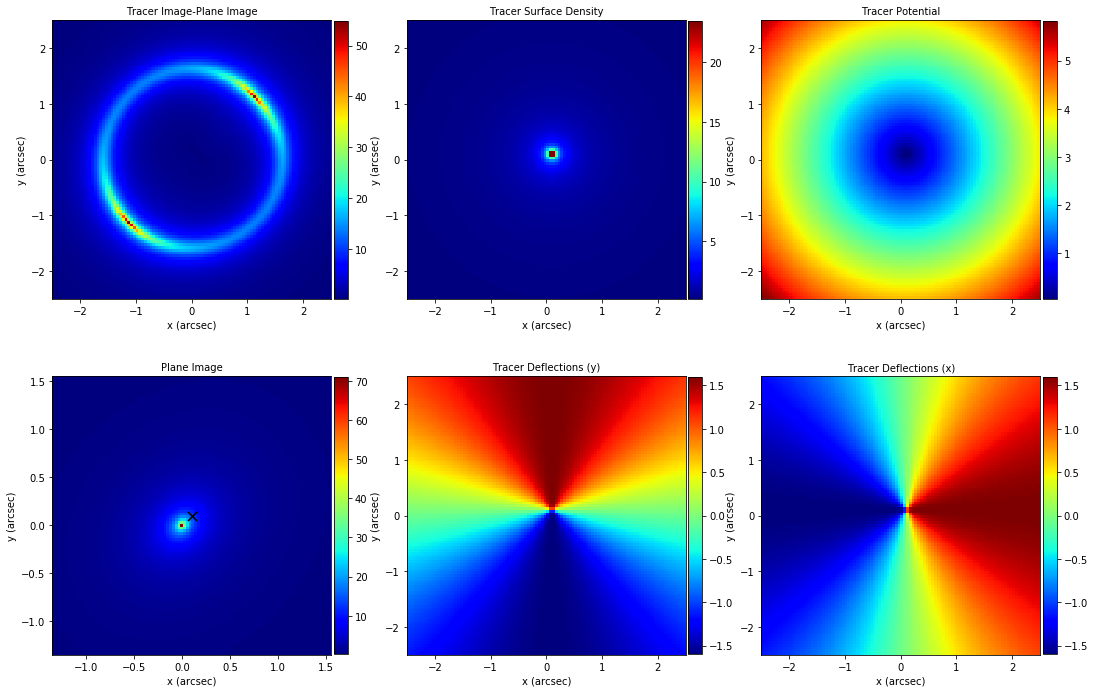

In [9]:
# AutoLens has tools for plotting a tracer. This plots the following:
# 1) The image-plane image, computed by tracing the source galaxy's light 'forwards' through the tracer.
# 2) The source-plane image, showing the source galaxy's true appearance (i.e. if it were not lensed).
# 3) The image-plane surface density, computed using the lens galaxy's mass profile.
# 4) The image-plane gravitational potential, computed using the lens galaxy's mass profile.
# 5) The image-plane deflection angles, computed using the lens galaxy's mass profile.
ray_tracing_plotters.plot_ray_tracing_subplot(tracer=tracer)

In [10]:
# These attributes can be assessed by print statements (Which you might notice have been converted to 2D NumPy arrays
# which are the same dimensions as our input image!).
print('Image-Pixel 1 - Tracer - Surface Density:')
print(tracer.surface_density[0,0])
print('Image-Pixel 2 - Tracer - Surface Density:')
print(tracer.surface_density[0,1])
print('Image-Pixel 3 - Tracer - Surface Density:')
print(tracer.surface_density[0,2])
print('Image-Pixel 101 - Tracer - Surface Density:')
print(tracer.surface_density[1,0])

Image-Pixel 1 - Tracer - Surface Density:
0.22837408161446565
Image-Pixel 2 - Tracer - Surface Density:
0.2307845675033594
Image-Pixel 3 - Tracer - Surface Density:
0.2332234593146764
Image-Pixel 101 - Tracer - Surface Density:


0.23059274542351155


In [11]:

# Of course, these surface densities are identical to the image-plane surface densities, as it's only the lens galaxy
# that contributes to the overall mass of the system.
print('Image-Pixel 1 - Image-Plane - Surface Density:')
print(tracer.image_plane.surface_density[0,0])
print('Image-Pixel 2 - Image-Plane - Surface Density:')
print(tracer.image_plane.surface_density[0,1])
print('Image-Pixel 3 - Image-Plane - Surface Density:')
print(tracer.image_plane.surface_density[0,2])
print('Image-Pixel 101 - Image-Plane - Surface Density:')
print(tracer.image_plane.surface_density[1,0])


Image-Pixel 1 - Image-Plane - Surface Density:
0.22837408161446565
Image-Pixel 2 - Image-Plane - Surface Density:
0.2307845675033594
Image-Pixel 3 - Image-Plane - Surface Density:


0.2332234593146764
Image-Pixel 101 - Image-Plane - Surface Density:
0.23059274542351155


In [12]:
# I've left the rest below commented to avoid too much printing, but you can inspect their data if you please!
# print('Potential:')
# print(tracer.potential)
# print(tracer.image_plane.potential)
# print('Deflections:')
# print(tracer.deflections_x)
# print(tracer.deflections_y)
# print(tracer.image_plane.deflections_x)
# print(tracer.image_plane.deflections_y)
# print('Image-plane Image:')
# print(tracer.image_plane_image)
# print(tracer.image_plane.image_plane_image)
# print('Source-plane Image:')
# print(tracer.source_plane_image)
# print(tracer.image_plane.source_plane_image)

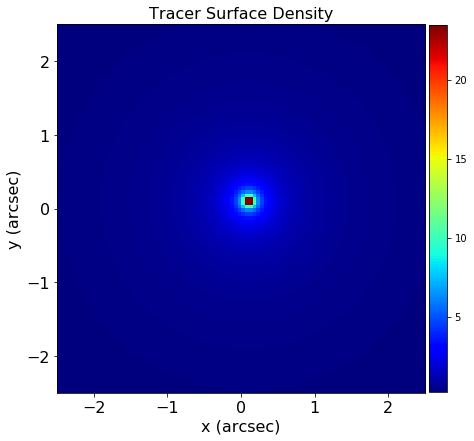

In [13]:
# You can also plot the above attributes on individual figures, using appropriate ray-tracing plotter (I've left most
# commented out again for convinience)
ray_tracing_plotters.plot_surface_density(tracer=tracer)
# ray_tracing_plotters.plot_potential(tracer=tracer)
# ray_tracing_plotters.plot_deflections_y(tracer=tracer)
#ray_tracing_plotters.plot_deflections_x(tracer=tracer)
# ray_tracing_plotters.plot_image_plane_image(tracer=tracer)

In [14]:
# 1) Convinience - You could always write 'tracer.image_plane.surface_density' and  
#                  'plane_plotters.surface_density(plane=tracer.image_plane). However, code appears neater if you can
#                   just write 'tracer.surface_density' and 'ray_tracing_plotters.plot_surface_density(tracer=tracer).

# 2) Multi-plane lensing - For now, we're focused on the image-plane + source-plane lensing configuration. However, 
#                          there are strong lens system where there are more than 2 planes! In these instances, the 
#                          surface density, potential and deflections of each plane is different to that of the tracer. 
#                          This is way beyond the scope of this chapter, but be reassured that what you're learning now
#                          will prepare you for the advanced chapters later on!

In [15]:
# And with that, we're done. You've performed your first actual lensing with PyAutoLens!

# 1) Change the lens galaxy's einstein radius - what happens to the tracer's image-plane image?
# 2) Change the source galaxy's effective radius - how does the image-plane image's appearance change?
# 3) Experiment with different light-profiles and mass-profiles. In particular, change the SphericalIsothermal
#    mass-profile to an EllipticalIsothermal mass-profile and set its axis_ratio parameter to 0.8. What
#    happens to the number of source images?